# Input -> Polynimal (degree = 5) -> log(1+x^2) -> StandardScaler ->Logistic -> Output

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# đọc file 
df= pd.read_excel('P1-SuperStoreUS-2015.xlsx',index_col=0)
df

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
Row ID,,,,,,,,,,,,,,,,,,,,,
20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,Storage & Organization,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,Telephones and Communication,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Illinois,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 20847 to 25914
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Priority        1952 non-null   object        
 1   Discount              1952 non-null   float64       
 2   Unit Price            1952 non-null   float64       
 3   Shipping Cost         1952 non-null   float64       
 4   Customer ID           1952 non-null   int64         
 5   Customer Name         1952 non-null   object        
 6   Ship Mode             1952 non-null   object        
 7   Customer Segment      1952 non-null   object        
 8   Product Category      1952 non-null   object        
 9   Product Sub-Category  1952 non-null   object        
 10  Product Container     1952 non-null   object        
 11  Product Name          1952 non-null   object        
 12  Product Base Margin   1936 non-null   float64       
 13  Country           

In [4]:
df=df.iloc[0:999]


# đổi cột

In [5]:
df.rename(columns={'Unit Price' : 'unitprice','Shipping Cost': 'shipcost', 
                         'Ship Mode':'shipmode','Customer Segment':'customerseg',
                         'Product Category':'PCate','Product Container':'PCon',
                         'Quantity ordered new':'Quantity'},inplace=True)
df

C:\Users\hungl\AppData\Local\Temp\ipykernel_8344\2089671222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Unit Price' : 'unitprice','Shipping Cost': 'shipcost',


,Order Priority,Discount,unitprice,shipcost,Customer ID,Customer Name,shipmode,customerseg,PCate,Product Sub-Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity,Sales,Order ID
Row ID,,,,,,,,,,,,,,,,,,,,,
20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.56000,4,13.01,88522
20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.36650,12,6362.85,90193
21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.80960,22,211.15,90192
24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.47050,16,1164.45,86838
24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.03000,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,Medium,0.07,60.98,49.00,1771,Jeff Spivey,Regular Air,Home Office,Office Supplies,Appliances,...,Central,Illinois,Freeport,61032,2015-03-06,2015-03-07,-807.89000,7,410.17,89106
19826,Low,0.09,12.95,4.98,1775,Marlene Kirk,Regular Air,Consumer,Office Supplies,Binders and Binder Accessories,...,Central,Indiana,South Bend,46614,2015-06-14,2015-06-21,123.89175,21,269.54,89944
20278,Not Specified,0.08,5.78,5.67,1776,Charlotte Patterson,Regular Air,Consumer,Office Supplies,Paper,...,Central,Indiana,Terre Haute,47802,2015-02-04,2015-02-05,-53.89800,19,106.57,89941


# Tạo cột IsProfit biết rằng nếu Profit lớn hơn 0 thì là YES , ngược lại là NO

In [6]:
df['IsProfit'] = df['Profit'].apply(lambda x: 'YES' if x > 0 else 'NO')


C:\Users\hungl\AppData\Local\Temp\ipykernel_8344\1644961232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsProfit'] = df['Profit'].apply(lambda x: 'YES' if x > 0 else 'NO')


In [7]:
df

,Order Priority,Discount,unitprice,shipcost,Customer ID,Customer Name,shipmode,customerseg,PCate,Product Sub-Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity,Sales,Order ID,IsProfit
Row ID,,,,,,,,,,,,,,,,,,,,,
20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.56000,4,13.01,88522,YES
20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,...,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.36650,12,6362.85,90193,YES
21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,...,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.80960,22,211.15,90192,NO
24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,...,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.47050,16,1164.45,86838,YES
24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.03000,7,22.23,86838,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,Medium,0.07,60.98,49.00,1771,Jeff Spivey,Regular Air,Home Office,Office Supplies,Appliances,...,Illinois,Freeport,61032,2015-03-06,2015-03-07,-807.89000,7,410.17,89106,NO
19826,Low,0.09,12.95,4.98,1775,Marlene Kirk,Regular Air,Consumer,Office Supplies,Binders and Binder Accessories,...,Indiana,South Bend,46614,2015-06-14,2015-06-21,123.89175,21,269.54,89944,YES
20278,Not Specified,0.08,5.78,5.67,1776,Charlotte Patterson,Regular Air,Consumer,Office Supplies,Paper,...,Indiana,Terre Haute,47802,2015-02-04,2015-02-05,-53.89800,19,106.57,89941,NO


In [8]:
df = df[['Discount', 'unitprice', 'shipcost', 'shipmode', 'customerseg', 'PCate', 
         'PCon', 'Region', 'Quantity', 'Sales', 'IsProfit']]
df

,Discount,unitprice,shipcost,shipmode,customerseg,PCate,PCon,Region,Quantity,Sales,IsProfit
Row ID,,,,,,,,,,,
20847,0.01,2.84,0.93,Express Air,Corporate,Office Supplies,Wrap Bag,West,4,13.01,YES
20228,0.02,500.98,26.00,Delivery Truck,Home Office,Furniture,Jumbo Drum,West,12,6362.85,YES
21776,0.06,9.48,7.29,Regular Air,Home Office,Furniture,Small Pack,East,22,211.15,NO
24844,0.09,78.69,19.99,Regular Air,Small Business,Furniture,Small Box,Central,16,1164.45,YES
24846,0.08,3.28,2.31,Regular Air,Small Business,Office Supplies,Wrap Bag,Central,7,22.23,NO
...,...,...,...,...,...,...,...,...,...,...,...
24894,0.07,60.98,49.00,Regular Air,Home Office,Office Supplies,Large Box,Central,7,410.17,NO
19826,0.09,12.95,4.98,Regular Air,Consumer,Office Supplies,Small Box,Central,21,269.54,YES
20278,0.08,5.78,5.67,Regular Air,Consumer,Office Supplies,Small Box,Central,19,106.57,NO


# 4.Mã hóa categorical data dùng One-Hot-Endcoding

In [9]:
dinhhuong = pd.get_dummies(df['shipmode']).astype(int)
df.drop('shipmode',axis=1,inplace=True)
df= pd.concat([df,dinhhuong],axis=1)
df.head(5)

C:\Users\hungl\AppData\Local\Temp\ipykernel_8344\490238402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('shipmode',axis=1,inplace=True)


,Discount,unitprice,shipcost,customerseg,PCate,PCon,Region,Quantity,Sales,IsProfit,Delivery Truck,Express Air,Regular Air
Row ID,,,,,,,,,,,,,
20847,0.01,2.84,0.93,Corporate,Office Supplies,Wrap Bag,West,4,13.01,YES,0,1,0
20228,0.02,500.98,26.00,Home Office,Furniture,Jumbo Drum,West,12,6362.85,YES,1,0,0
21776,0.06,9.48,7.29,Home Office,Furniture,Small Pack,East,22,211.15,NO,0,0,1
24844,0.09,78.69,19.99,Small Business,Furniture,Small Box,Central,16,1164.45,YES,0,0,1
24846,0.08,3.28,2.31,Small Business,Office Supplies,Wrap Bag,Central,7,22.23,NO,0,0,1


In [10]:
dinhhuong = pd.get_dummies(df['customerseg']).astype(int)
df.drop('customerseg',axis=1,inplace=True)
df= pd.concat([df,dinhhuong],axis=1)
df.head(5)

,Discount,unitprice,shipcost,PCate,PCon,Region,Quantity,Sales,IsProfit,Delivery Truck,Express Air,Regular Air,Consumer,Corporate,Home Office,Small Business
Row ID,,,,,,,,,,,,,,,,
20847,0.01,2.84,0.93,Office Supplies,Wrap Bag,West,4,13.01,YES,0,1,0,0,1,0,0
20228,0.02,500.98,26.00,Furniture,Jumbo Drum,West,12,6362.85,YES,1,0,0,0,0,1,0
21776,0.06,9.48,7.29,Furniture,Small Pack,East,22,211.15,NO,0,0,1,0,0,1,0
24844,0.09,78.69,19.99,Furniture,Small Box,Central,16,1164.45,YES,0,0,1,0,0,0,1
24846,0.08,3.28,2.31,Office Supplies,Wrap Bag,Central,7,22.23,NO,0,0,1,0,0,0,1


In [11]:

dinhhuong = pd.get_dummies(df['PCate']).astype(int)
df.drop('PCate',axis=1,inplace=True)
df= pd.concat([df,dinhhuong],axis=1)
df.head(5)

,Discount,unitprice,shipcost,PCon,Region,Quantity,Sales,IsProfit,Delivery Truck,Express Air,Regular Air,Consumer,Corporate,Home Office,Small Business,Furniture,Office Supplies,Technology
Row ID,,,,,,,,,,,,,,,,,,
20847,0.01,2.84,0.93,Wrap Bag,West,4,13.01,YES,0,1,0,0,1,0,0,0,1,0
20228,0.02,500.98,26.00,Jumbo Drum,West,12,6362.85,YES,1,0,0,0,0,1,0,1,0,0
21776,0.06,9.48,7.29,Small Pack,East,22,211.15,NO,0,0,1,0,0,1,0,1,0,0
24844,0.09,78.69,19.99,Small Box,Central,16,1164.45,YES,0,0,1,0,0,0,1,1,0,0
24846,0.08,3.28,2.31,Wrap Bag,Central,7,22.23,NO,0,0,1,0,0,0,1,0,1,0


In [12]:

dinhhuong = pd.get_dummies(df['PCon']).astype(int)
df.drop('PCon',axis=1,inplace=True)
df= pd.concat([df,dinhhuong],axis=1)
df.head(5)

,Discount,unitprice,shipcost,Region,Quantity,Sales,IsProfit,Delivery Truck,Express Air,Regular Air,...,Furniture,Office Supplies,Technology,Jumbo Box,Jumbo Drum,Large Box,Medium Box,Small Box,Small Pack,Wrap Bag
Row ID,,,,,,,,,,,,,,,,,,,,,
20847,0.01,2.84,0.93,West,4,13.01,YES,0,1,0,...,0,1,0,0,0,0,0,0,0,1
20228,0.02,500.98,26.00,West,12,6362.85,YES,1,0,0,...,1,0,0,0,1,0,0,0,0,0
21776,0.06,9.48,7.29,East,22,211.15,NO,0,0,1,...,1,0,0,0,0,0,0,0,1,0
24844,0.09,78.69,19.99,Central,16,1164.45,YES,0,0,1,...,1,0,0,0,0,0,0,1,0,0
24846,0.08,3.28,2.31,Central,7,22.23,NO,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [13]:

dinhhuong = pd.get_dummies(df['Region']).astype(int)
df.drop('Region',axis=1,inplace=True)
df= pd.concat([df,dinhhuong],axis=1)
df.head(5)

,Discount,unitprice,shipcost,Quantity,Sales,IsProfit,Delivery Truck,Express Air,Regular Air,Consumer,...,Jumbo Drum,Large Box,Medium Box,Small Box,Small Pack,Wrap Bag,Central,East,South,West
Row ID,,,,,,,,,,,,,,,,,,,,,
20847,0.01,2.84,0.93,4,13.01,YES,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
20228,0.02,500.98,26.00,12,6362.85,YES,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
21776,0.06,9.48,7.29,22,211.15,NO,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
24844,0.09,78.69,19.99,16,1164.45,YES,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
24846,0.08,3.28,2.31,7,22.23,NO,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [14]:
dinhhuong = pd.get_dummies(df['IsProfit'],drop_first=True)
dinhhuong=dinhhuong.astype(int)
df.drop('IsProfit',axis=1,inplace=True)
df= pd.concat([df,dinhhuong],axis=1)
df.head(5)

,Discount,unitprice,shipcost,Quantity,Sales,Delivery Truck,Express Air,Regular Air,Consumer,Corporate,...,Large Box,Medium Box,Small Box,Small Pack,Wrap Bag,Central,East,South,West,YES
Row ID,,,,,,,,,,,,,,,,,,,,,
20847,0.01,2.84,0.93,4,13.01,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,1
20228,0.02,500.98,26.00,12,6362.85,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
21776,0.06,9.48,7.29,22,211.15,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
24844,0.09,78.69,19.99,16,1164.45,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
24846,0.08,3.28,2.31,7,22.23,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


In [15]:
df.rename(columns={'YES':'IsProfit'}, inplace=True)
df.head(5)

,Discount,unitprice,shipcost,Quantity,Sales,Delivery Truck,Express Air,Regular Air,Consumer,Corporate,...,Large Box,Medium Box,Small Box,Small Pack,Wrap Bag,Central,East,South,West,IsProfit
Row ID,,,,,,,,,,,,,,,,,,,,,
20847,0.01,2.84,0.93,4,13.01,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,1
20228,0.02,500.98,26.00,12,6362.85,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
21776,0.06,9.48,7.29,22,211.15,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
24844,0.09,78.69,19.99,16,1164.45,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
24846,0.08,3.28,2.31,7,22.23,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 20847 to 21163
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Discount         999 non-null    float64
 1   unitprice        999 non-null    float64
 2   shipcost         999 non-null    float64
 3   Quantity         999 non-null    int64  
 4   Sales            999 non-null    float64
 5   Delivery Truck   999 non-null    int32  
 6   Express Air      999 non-null    int32  
 7   Regular Air      999 non-null    int32  
 8   Consumer         999 non-null    int32  
 9   Corporate        999 non-null    int32  
 10  Home Office      999 non-null    int32  
 11  Small Business   999 non-null    int32  
 12  Furniture        999 non-null    int32  
 13  Office Supplies  999 non-null    int32  
 14  Technology       999 non-null    int32  
 15  Jumbo Box        999 non-null    int32  
 16  Jumbo Drum       999 non-null    int32  
 17  Large Box      

# Xây dựng mô hình dự báo IsProfit dựa trên Discount, unitprice, shipcost, shipmode, customerseg, PCate, PCon, Region, Quantity, Sales với Cross validation là train 80%, test 20% và random_state = 16

In [17]:
X = df.drop('IsProfit',axis=1).values
Y = df[['IsProfit']].values

In [18]:
# Chia tách ra trainning (huấn luyện) và testing (kiểm thử) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=16)

# polymial(degree=5)-->log(1+x*x)-->standar --> Logictis

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
# hàm biến đổi log(1+X^2)
def log_1_x_2(X):
    return np.log(1+X**2)
# functiontransformer
log_1_x_2_transformer = FunctionTransformer(log_1_x_2)
#
steps = [('polymial',PolynomialFeatures(include_bias=False,degree=5)),
         ('log(1+x*x)',log_1_x_2_transformer),
         ('standar',StandardScaler()),
         ('Logistic',LogisticRegression())]
model = Pipeline(steps)
model.fit(X_train,y_train.flatten())

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('polymial', PolynomialFeatures(degree=5, include_bias=False)),
                ('log(1+x*x)',
                 FunctionTransformer(func=<function log_1_x_2 at 0x00000225C3973CE0>)),
                ('standar', StandardScaler()),
                ('Logistic', LogisticRegression())])

# liblinear

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
# hàm biến đổi log(1+X^2)
def log_1_x_2(X):
    return np.log(1+X**2)
# functiontransformer
log_1_x_2_transformer = FunctionTransformer(log_1_x_2)
#
steps = [('polymial',PolynomialFeatures(include_bias=False,degree=3)),
         ('log(1+x*x)',log_1_x_2_transformer),
         ('standar',StandardScaler()),
         ('Logistic', LogisticRegression(solver='liblinear', max_iter=10, penalty='l2'))
]
model = Pipeline(steps)

# Huấn luyện mô hình
model.fit(X_train, y_train)


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('polymial', PolynomialFeatures(degree=3, include_bias=False)),
                ('log(1+x*x)',
                 FunctionTransformer(func=<function log_1_x_2 at 0x00000225BE105F80>)),
                ('standar', StandardScaler()),
                ('Logistic',
                 LogisticRegression(max_iter=10, solver='liblinear'))])

# Test liblinear

In [21]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.705
AUC: 0.704781912765106


# Train liblinear

In [22]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_train)

# Tính Accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.983729662077597
AUC: 0.9835538278261959


# ROC và AUE Plot

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# TEST

# Đường cong càng ôm góc trên bên trái của biểu đồ thì mô hình càng phân loại dữ liệu thành các danh mục tốt hơn.

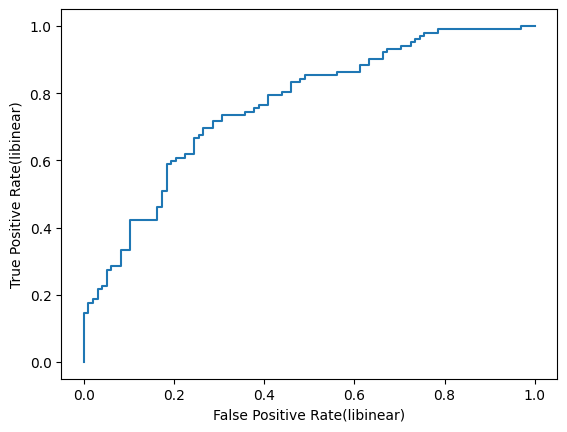

In [24]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(libinear)')
plt.xlabel('False Positive Rate(libinear)')
plt.show() 

Để định lượng điều này, chúng ta có thể tính toán AUC – diện tích dưới đường cong – cho chúng ta biết phần nằm dưới đường cong là bao nhiêu.

AUC càng gần 1 thì mô hình càng tốt. Một mô hình có AUC bằng 0,5 không tốt hơn mô hình phân loại ngẫu nhiên.

In [25]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.762404961984794

# ROC 

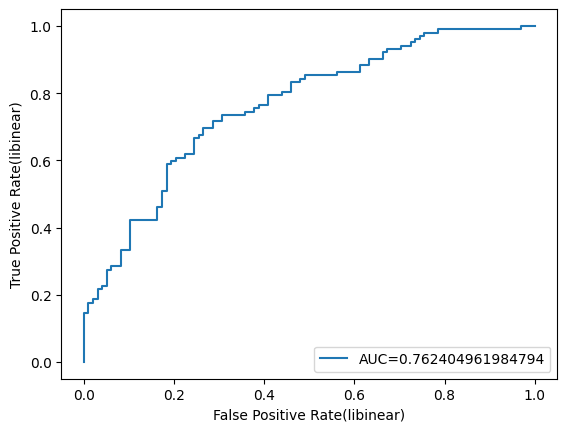

In [26]:
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(libinear)')
plt.xlabel('False Positive Rate(libinear)')
plt.legend(loc=4)
plt.show()

# TRAIN

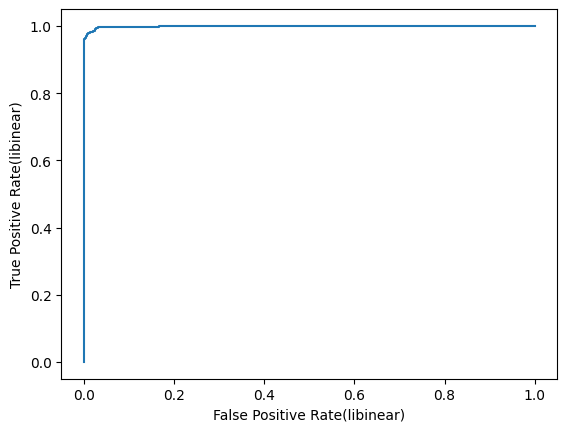

In [27]:
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(libinear)')
plt.xlabel('False Positive Rate(libinear)')
plt.show() 

In [28]:
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
auc

0.9990344222208288

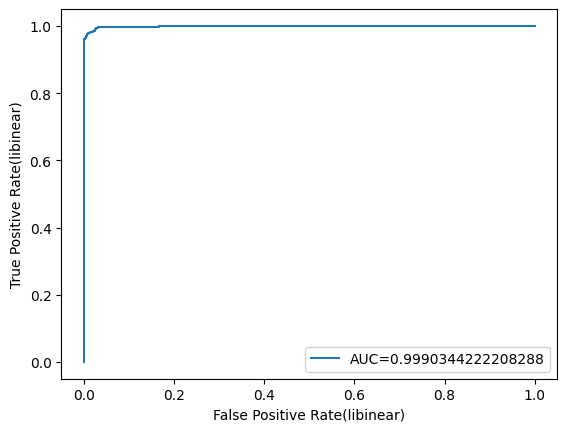

In [29]:
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(libinear)')
plt.xlabel('False Positive Rate(libinear)')
plt.legend(loc=4)
plt.show()

# lbfgs

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TẬP TRAIN


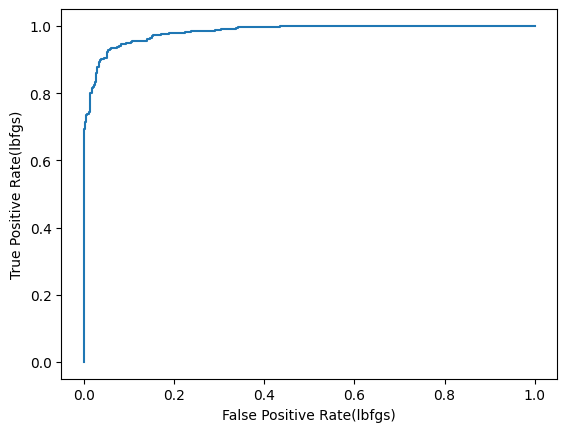

AUC test 0.9824942002633394


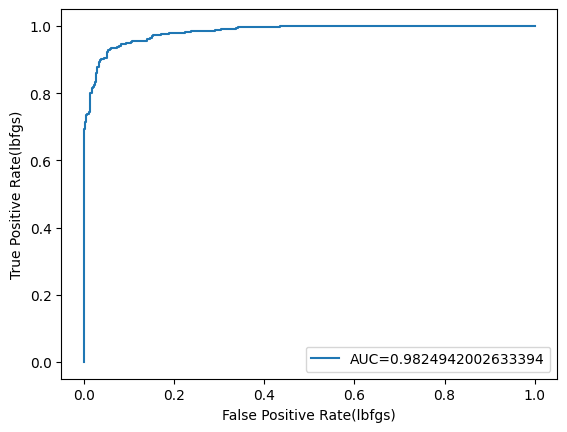

TẬP TEST(lbfgs)


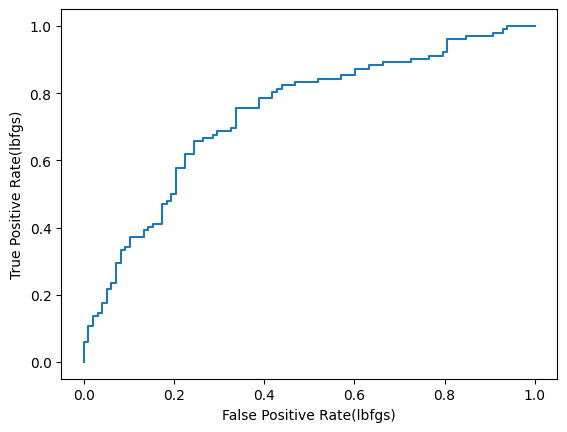

AUC test 0.7383953581432572


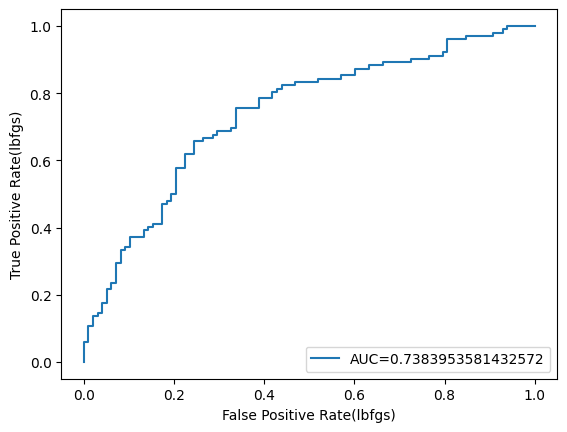

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
# hàm biến đổi log(1+X^2)
def log_1_x_2(X):
    return np.log(1+X**2)
# functiontransformer
log_1_x_2_transformer = FunctionTransformer(log_1_x_2)
#
steps = [('polymial',PolynomialFeatures(include_bias=False,degree=5)),
         ('log(1+x*x)',log_1_x_2_transformer),
         ('standar',StandardScaler()),
         ('Logistic', LogisticRegression(solver='lbfgs', max_iter=10, penalty='l2'))
]
model = Pipeline(steps)

# Huấn luyện mô hình
model.fit(X_train, y_train)
# TRAIN
print ('TẬP TRAIN')
# AUE
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(lbfgs)')
plt.xlabel('False Positive Rate(lbfgs)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(lbfgs)')
plt.xlabel('False Positive Rate(lbfgs)')
plt.legend(loc=4)
plt.show()

# TEST
print('TẬP TEST(lbfgs)')
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(lbfgs)')
plt.xlabel('False Positive Rate(lbfgs)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(lbfgs)')
plt.xlabel('False Positive Rate(lbfgs)')
plt.legend(loc=4)
plt.show()

# tập test voi lbfgs

In [31]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.68
AUC: 0.679671868747499


# tập train lbfgs

In [32]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_train)

# Tính Accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.9361702127659575
AUC: 0.9358956674399649


# AUE and ROC plot

# Newton-cg

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


TẬP TRAIN


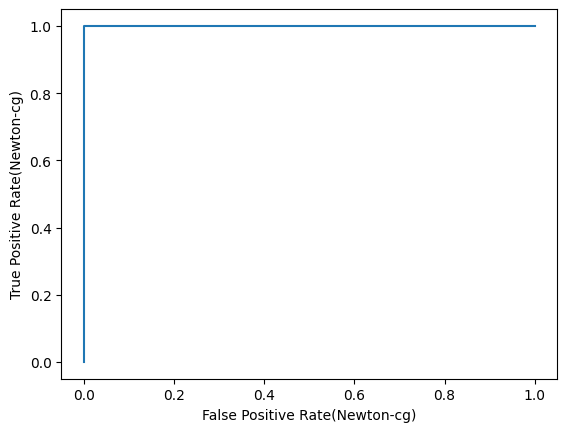

AUC test 1.0


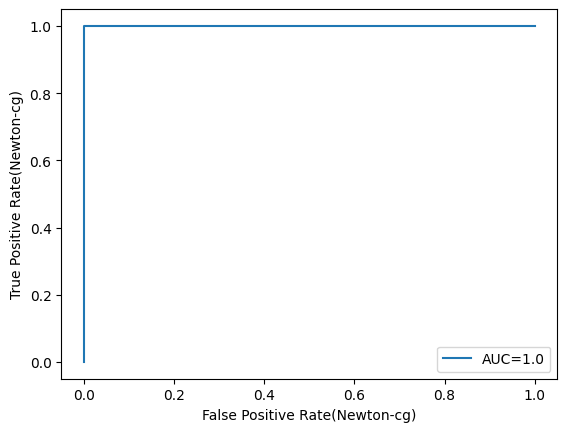

TẬP TEST


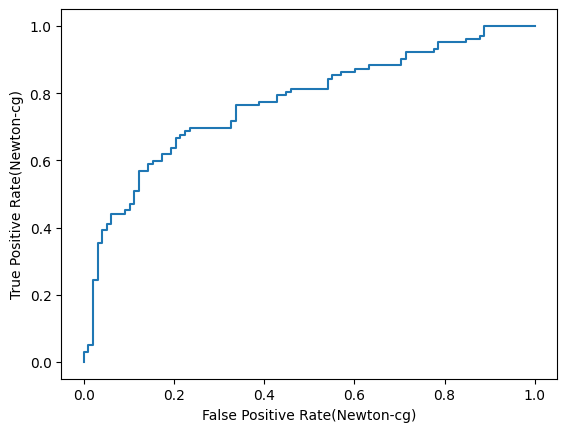

AUC test 0.772609043617447


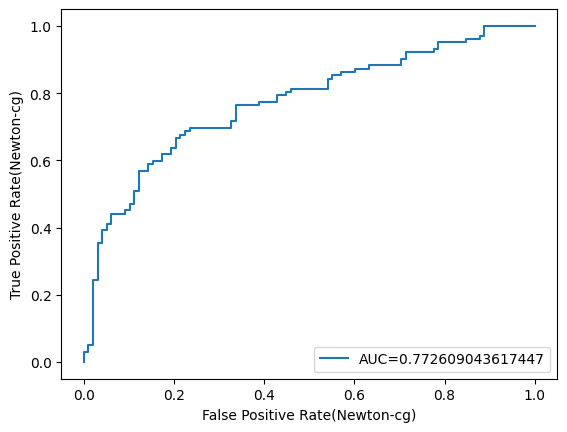

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
# hàm biến đổi log(1+X^2)
def log_1_x_2(X):
    return np.log(1+X**2)
# functiontransformer
log_1_x_2_transformer = FunctionTransformer(log_1_x_2)
#
steps = [('polymial',PolynomialFeatures(include_bias=False,degree=5)),
         ('log(1+x*x)',log_1_x_2_transformer),
         ('standar',StandardScaler()),
         ('Logistic', LogisticRegression(solver='newton-cg', max_iter=10, penalty='l2'))
]
model = Pipeline(steps)

# Huấn luyện mô hình
model.fit(X_train, y_train)


# TRAIN
print ('TẬP TRAIN')
# AUE
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Newton-cg)')
plt.xlabel('False Positive Rate(Newton-cg)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Newton-cg)')
plt.xlabel('False Positive Rate(Newton-cg)')
plt.legend(loc=4)
plt.show()

# TEST
print('TẬP TEST')
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Newton-cg)')
plt.xlabel('False Positive Rate(Newton-cg)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Newton-cg)')
plt.xlabel('False Positive Rate(Newton-cg)')
plt.legend(loc=4)
plt.show()

# tập test voi newton-cg

In [34]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.69
AUC: 0.689875950380152


# tập train newton-cg

In [35]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_train)

# Tính Accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.9987484355444305
AUC: 0.9987146529562982


# newton-cholesky

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
# hàm biến đổi log(1+X^2)
def log_1_x_2(X):
    return np.log(1+X**2)
# functiontransformer
log_1_x_2_transformer = FunctionTransformer(log_1_x_2)
#
steps = [('polymial',PolynomialFeatures(include_bias=False,degree=5)),
         ('log(1+x*x)',log_1_x_2_transformer),
         ('standar',StandardScaler()),
         ('Logistic', LogisticRegression(solver='newton-cholesky', max_iter=10, penalty='l2'))
]
model = Pipeline(steps)

# Huấn luyện mô hình
model.fit(X_train, y_train)


# TRAIN
print ('TẬP TRAIN')
# AUE
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Newton-Cholesky)')
plt.xlabel('False Positive Rate(Newton-Cholesky)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Newton-Cholesky)')
plt.xlabel('False Positive Rate(Newton-Cholesky)')
plt.legend(loc=4)
plt.show()

# TEST
print('TẬP TEST')
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Newton-Cholesky)')
plt.xlabel('False Positive Rate(Newton-Cholesky)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Newton-Cholesky)')
plt.xlabel('False Positive Rate(Newton-Cholesky)')
plt.legend(loc=4)
plt.show()


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MemoryError: Unable to allocate 215. GiB for an array with shape (169911, 169911) and data type float64

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.715
AUC: 0.7145858343337335


In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_train)

# Tính Accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.983729662077597
AUC: 0.9835538278261959


# Sag

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


TẬP TRAIN


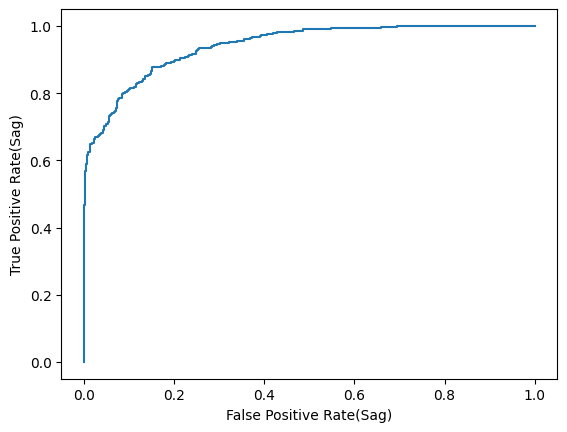

AUC test 0.9415637344034108


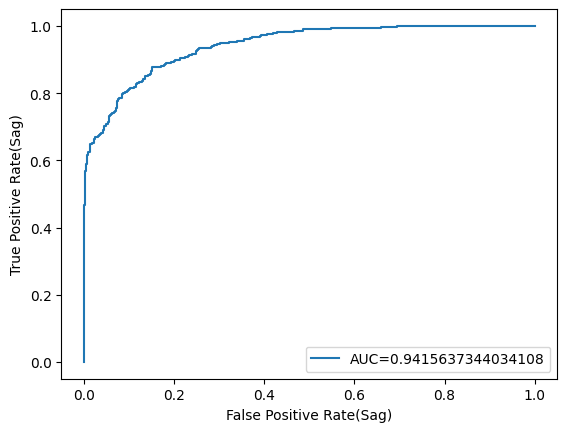

TẬP TEST


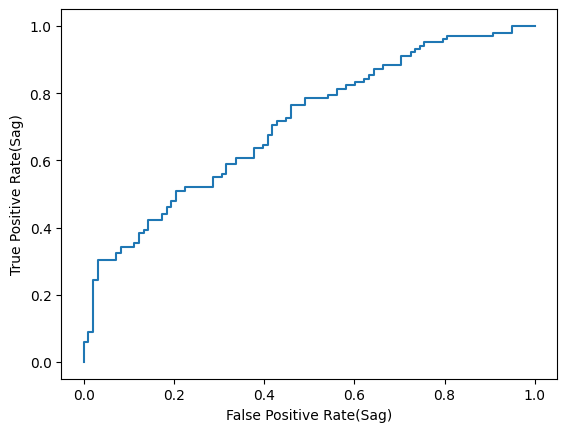

AUC test 0.7073829531812725


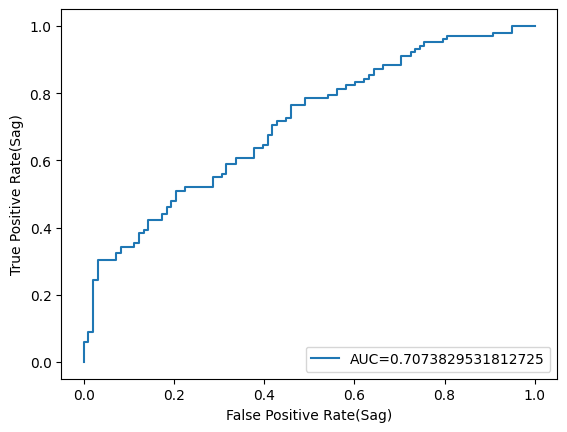

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
# hàm biến đổi log(1+X^2)
def log_1_x_2(X):
    return np.log(1+X**2)
# functiontransformer
log_1_x_2_transformer = FunctionTransformer(log_1_x_2)
#
steps = [('polymial',PolynomialFeatures(include_bias=False,degree=5)),
         ('log(1+x*x)',log_1_x_2_transformer),
         ('standar',StandardScaler()),
         ('Logistic', LogisticRegression(solver='sag', max_iter=10, penalty='l2'))
]
model = Pipeline(steps)

# Huấn luyện mô hình
model.fit(X_train, y_train)
# TRAIN
print ('TẬP TRAIN')
# AUE
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Sag)')
plt.xlabel('False Positive Rate(Sag)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Sag)')
plt.xlabel('False Positive Rate(Sag)')
plt.legend(loc=4)
plt.show()

# TEST
print('TẬP TEST')
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Sag)')
plt.xlabel('False Positive Rate(Sag)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Sag)')
plt.xlabel('False Positive Rate(Sag)')
plt.legend(loc=4)
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.625
AUC: 0.6249499799919969


In [39]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_train)

# Tính Accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.8573216520650814
AUC: 0.8562355006583485


# Saga

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


TẬP TRAIN


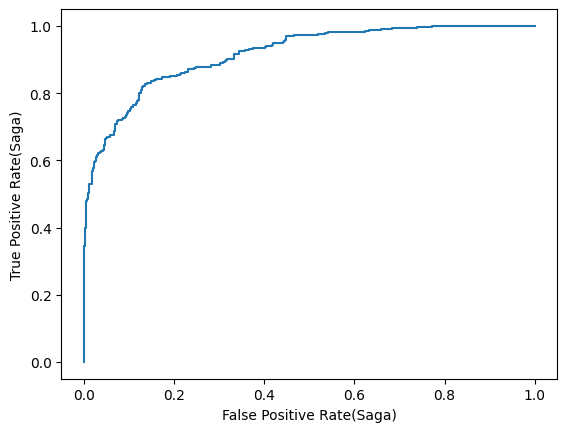

AUC test 0.9169164210922315


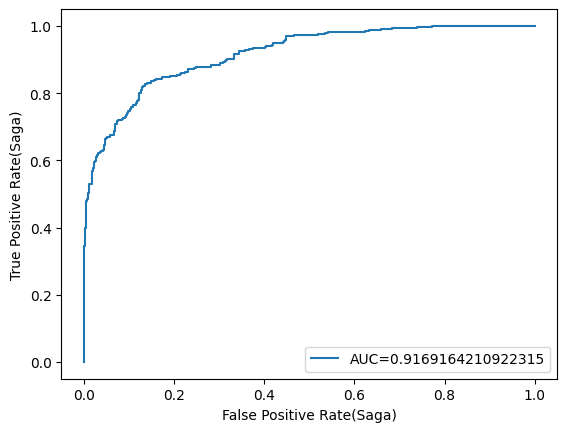

TẬP TEST


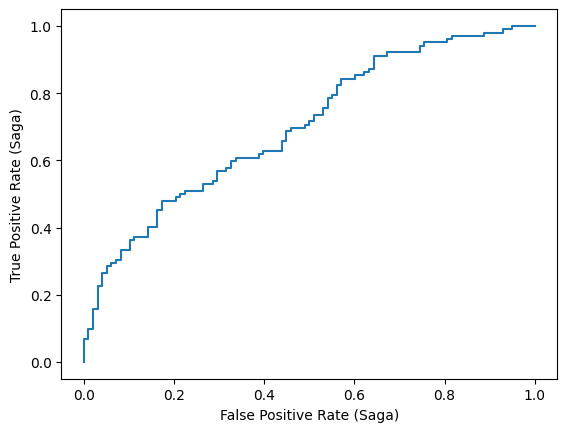

AUC test 0.7003801520608244


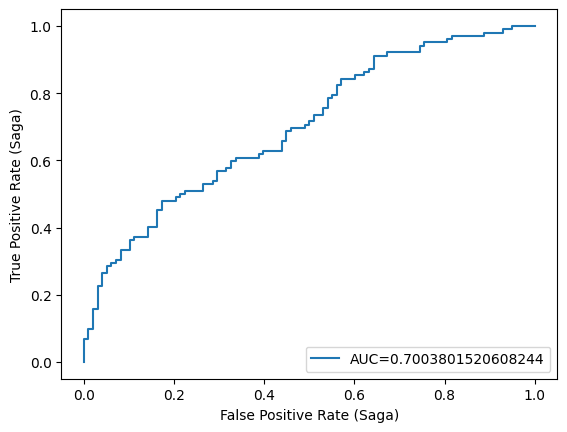

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
# hàm biến đổi log(1+X^2)
def log_1_x_2(X):
    return np.log(1+X**2)
# functiontransformer
log_1_x_2_transformer = FunctionTransformer(log_1_x_2)
#
steps = [('polymial',PolynomialFeatures(include_bias=False,degree=5)),
         ('log(1+x*x)',log_1_x_2_transformer),
         ('standar',StandardScaler()),
         ('Logistic', LogisticRegression(solver='saga', max_iter=10, penalty='l2'))
]
model = Pipeline(steps)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# TRAIN
print ('TẬP TRAIN')
# AUE
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Saga)')
plt.xlabel('False Positive Rate(Saga)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Saga)')
plt.xlabel('False Positive Rate(Saga)')
plt.legend(loc=4)
plt.show()

# TEST
print('TẬP TEST')
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate (Saga)')
plt.xlabel('False Positive Rate (Saga)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate (Saga)')
plt.xlabel('False Positive Rate (Saga)')
plt.legend(loc=4)
plt.show()


In [43]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.6
AUC: 0.5994397759103641


In [42]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_train)

# Tính Accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.8297872340425532
AUC: 0.8284845444855476
